<a href="https://www.kaggle.com/code/akshaypatil7015/time-series-analysis-project?scriptVersionId=175797333" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing,data manipulation, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
#pip install xgboost

# Data Loading

In [2]:
df=pd.read_csv("/kaggle/input/energy-consumption/household_power_consumption.txt", sep=";", 
               parse_dates={'DateTime' : ['Date', 'Time']}, index_col='DateTime')

/tmp/ipykernel_19/3335856667.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/kaggle/input/energy-consumption/household_power_consumption.txt", sep=";",
/tmp/ipykernel_19/3335856667.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df=pd.read_csv("/kaggle/input/energy-consumption/household_power_consumption.txt", sep=";",


In [3]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [5]:
df.shape

(2075259, 7)

In [6]:
#In 2006 just 16 days data is available so removed 2006 data
df=df[df.index.year>2006]

In [7]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2007-01-01 00:00:00,2.580,0.136,241.970,10.600,0.000,0.000,0.0
2007-01-01 00:01:00,2.552,0.100,241.750,10.400,0.000,0.000,0.0
2007-01-01 00:02:00,2.550,0.100,241.640,10.400,0.000,0.000,0.0
2007-01-01 00:03:00,2.550,0.100,241.710,10.400,0.000,0.000,0.0
2007-01-01 00:04:00,2.554,0.100,241.980,10.400,0.000,0.000,0.0


In [8]:
df.shape

(2053263, 7)

In [9]:
df.isna().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25975
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2053263 entries, 2007-01-01 00:00:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 125.3+ MB


In [11]:
# drop some unwanted features
df.drop(['Voltage', 'Global_reactive_power', 'Global_intensity'], axis=1, inplace=True)

In [12]:
df.query('Sub_metering_3 != Sub_metering_3')

,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,
2007-01-14 18:36:00,?,?,?,NaN
2007-01-28 17:13:00,?,?,?,NaN
2007-02-22 22:58:00,?,?,?,NaN
2007-02-22 22:59:00,?,?,?,NaN
2007-03-25 17:52:00,?,?,?,NaN
...,...,...,...,...
2010-09-28 19:09:00,?,?,?,NaN
2010-09-28 19:10:00,?,?,?,NaN
2010-09-28 19:11:00,?,?,?,NaN


In [13]:
#Convert to numeric
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2053263 entries, 2007-01-01 00:00:00 to 2010-11-26 21:02:00
Data columns (total 4 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Global_active_power  float64
 1   Sub_metering_1       float64
 2   Sub_metering_2       float64
 3   Sub_metering_3       float64
dtypes: float64(4)
memory usage: 78.3 MB


In [15]:
df.isna().sum()

Global_active_power    25975
Sub_metering_1         25975
Sub_metering_2         25975
Sub_metering_3         25975
dtype: int64

# Created calculated Field

In [16]:
# created calculated field
df['Power_Consumption'] =((df['Global_active_power']*1000)/60) - (df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3'])
df.head()

,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,Power_Consumption
DateTime,,,,,
2007-01-01 00:00:00,2.580,0.0,0.0,0.0,43.000000
2007-01-01 00:01:00,2.552,0.0,0.0,0.0,42.533333
2007-01-01 00:02:00,2.550,0.0,0.0,0.0,42.500000
2007-01-01 00:03:00,2.550,0.0,0.0,0.0,42.500000
2007-01-01 00:04:00,2.554,0.0,0.0,0.0,42.566667


In [17]:
df.query('Power_Consumption != Power_Consumption')

,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,Power_Consumption
DateTime,,,,,
2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN
2007-01-28 17:13:00,NaN,NaN,NaN,NaN,NaN
2007-02-22 22:58:00,NaN,NaN,NaN,NaN,NaN
2007-02-22 22:59:00,NaN,NaN,NaN,NaN,NaN
2007-03-25 17:52:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2010-09-28 19:09:00,NaN,NaN,NaN,NaN,NaN
2010-09-28 19:10:00,NaN,NaN,NaN,NaN,NaN
2010-09-28 19:11:00,NaN,NaN,NaN,NaN,NaN


# Fill Missing values

In [18]:
df.interpolate(method='time', inplace= True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2053263 entries, 2007-01-01 00:00:00 to 2010-11-26 21:02:00
Data columns (total 5 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Global_active_power  float64
 1   Sub_metering_1       float64
 2   Sub_metering_2       float64
 3   Sub_metering_3       float64
 4   Power_Consumption    float64
dtypes: float64(5)
memory usage: 94.0 MB


In [20]:
df.isna().sum()

Global_active_power    0
Sub_metering_1         0
Sub_metering_2         0
Sub_metering_3         0
Power_Consumption      0
dtype: int64

## Data Visualization

<Axes: xlabel='DateTime'>

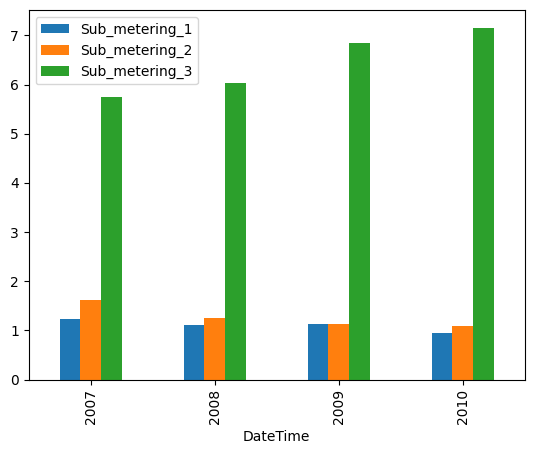

In [21]:
df.groupby(df.index.year).mean().plot(y=['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'],kind='bar')

<Axes: xlabel='DateTime'>

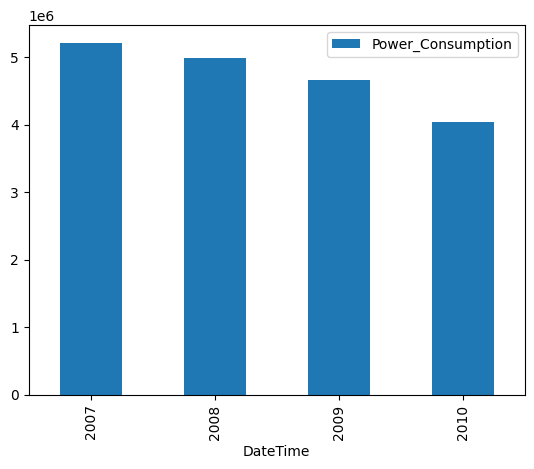

In [22]:
df.groupby(df.index.year).sum().plot(y='Power_Consumption',kind='bar')

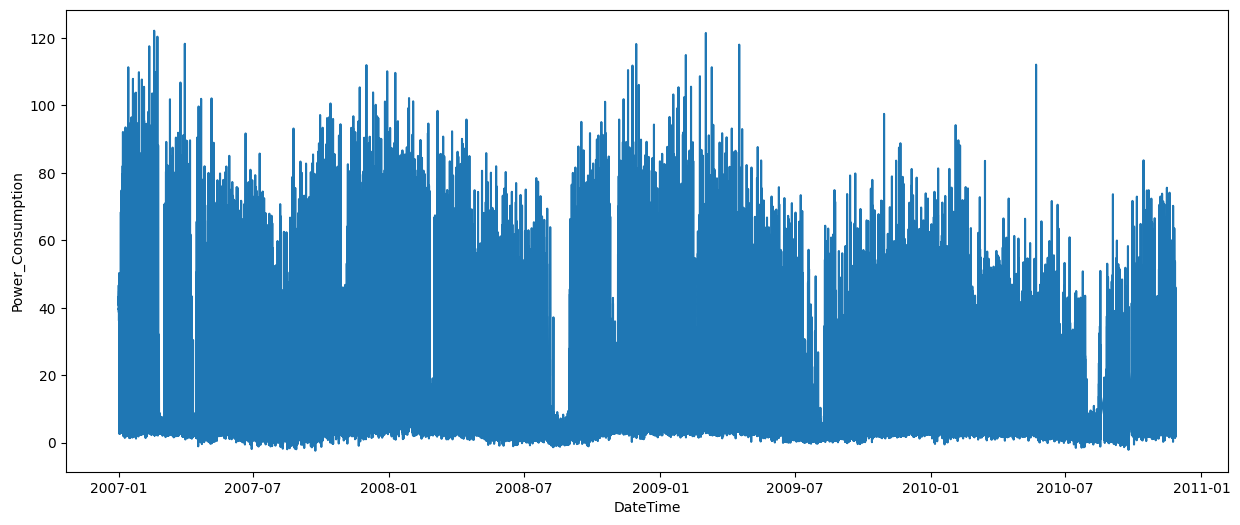

In [23]:
plt.figure(figsize=(15,6))
sns.lineplot(x='DateTime',y='Power_Consumption', data=df,)
plt.show()

In [24]:
# create new dataframe
week_df=df.resample('7D').mean()
month_df=df.resample('m').mean()

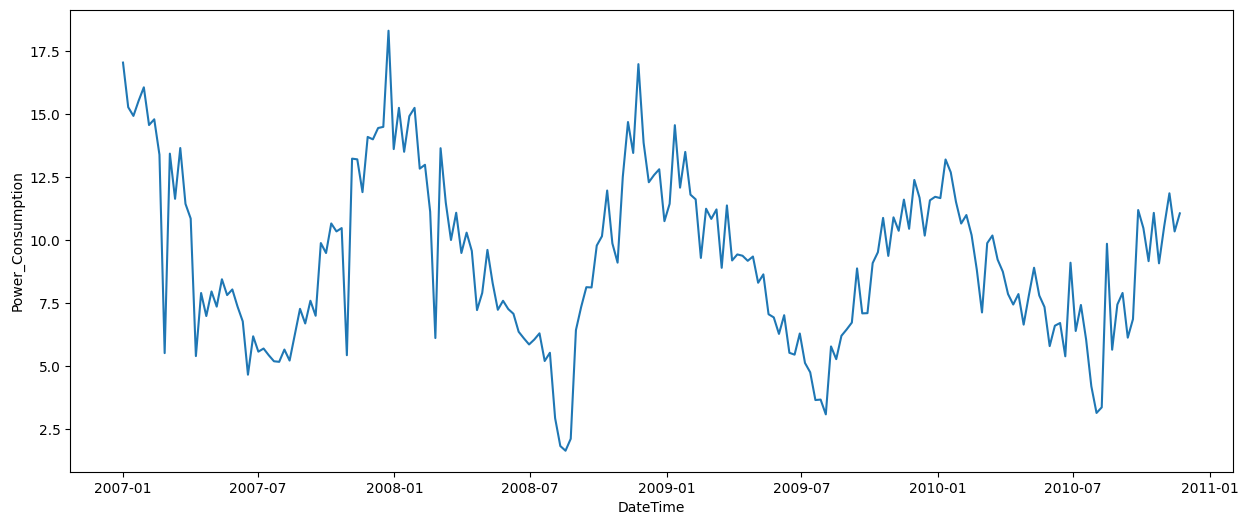

In [25]:
plt.figure(figsize=(15,6))
sns.lineplot(x='DateTime',y='Power_Consumption', data=week_df)
plt.show()

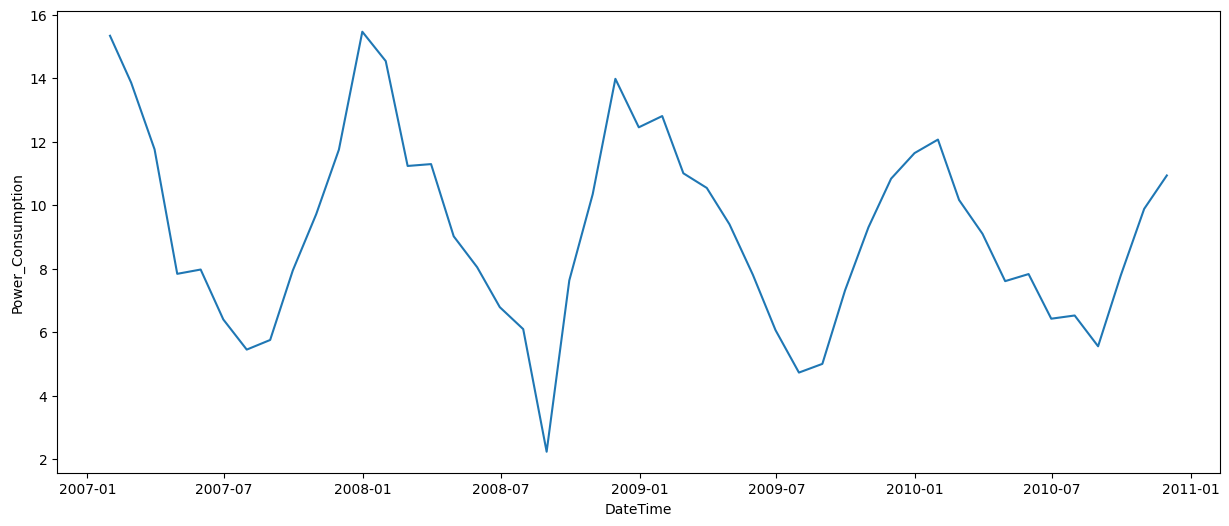

In [26]:
plt.figure(figsize=(15,6))
sns.lineplot(x='DateTime',y='Power_Consumption', data=month_df)
plt.show()

In [27]:
print(f'weekly_df shape = {week_df.shape}')
print(f'monthly_df shape = {month_df.shape}')

weekly_df shape = (204, 5)
monthly_df shape = (47, 5)


# Model building

In [28]:
reg_week_df=week_df.reset_index()
reg_week_df['year'] = reg_week_df['DateTime'].dt.year
reg_week_df['month'] = reg_week_df['DateTime'].dt.month
reg_week_df['day'] = reg_week_df['DateTime'].dt.day
reg_week_df['dayofweek'] = reg_week_df['DateTime'].dt.dayofweek
reg_week_df['quarter'] = reg_week_df['DateTime'].dt.quarter
reg_week_df['dayofyear'] = reg_week_df['DateTime'].dt.dayofyear

reg_week_df.drop(['Global_active_power','Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], inplace=True, axis=1)
reg_week_df.set_index('DateTime', inplace=True)
reg_week_df.head()

,Power_Consumption,year,month,day,dayofweek,quarter,dayofyear
DateTime,,,,,,,
2007-01-01,17.033942,2007,1,1,0,1,1
2007-01-08,15.265637,2007,1,8,0,1,8
2007-01-15,14.921207,2007,1,15,0,1,15
2007-01-22,15.520852,2007,1,22,0,1,22
2007-01-29,16.054484,2007,1,29,0,1,29


In [29]:
X_week=reg_week_df.drop('Power_Consumption', axis=1)
y_week=reg_week_df[['Power_Consumption']]

In [30]:
# train test split
x_train_week,x_test_week,y_train_week,y_test_week=X_week[:-12],X_week[-12:],y_week[:-12],y_week[-12:]
print(f'x_train: {x_train_week.shape}, y_train: {y_train_week.shape}, x_test: {x_test_week.shape}, y_test: {y_test_week.shape}')

x_train: (192, 6), y_train: (192, 1), x_test: (12, 6), y_test: (12, 1)


In [31]:
# Random forest regressor Model
from sklearn.ensemble import RandomForestRegressor

reg_week_model = RandomForestRegressor()
reg_week_model.fit(x_train_week,y_train_week)

/tmp/ipykernel_19/833887997.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_week_model.fit(x_train_week,y_train_week)


RandomForestRegressor()

In [32]:
# prediction
reg_week_model_pred=reg_week_model.predict(x_test_week)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
rmse_reg_weekly = sqrt(mean_squared_error(y_test_week, reg_week_model_pred))
r2_reg_weekly = r2_score(y_test_week, reg_week_model_pred)
print(f'RMSE score for Random Forest Regressor: {rmse_reg_weekly:.2f}')
print(f'r2 score of Random Forest on weekly basis: {r2_reg_weekly:.2f}')

RMSE score for Random Forest Regressor: 1.25
r2 score of Random Forest on weekly basis: 0.49


## Monthly df

In [34]:
reg_month_df=month_df.reset_index()
reg_month_df['year'] = reg_month_df['DateTime'].dt.year
reg_month_df['month'] = reg_month_df['DateTime'].dt.month
reg_month_df['day'] = reg_month_df['DateTime'].dt.day
reg_month_df['dayofweek'] = reg_month_df['DateTime'].dt.dayofweek
reg_month_df['quarter'] = reg_month_df['DateTime'].dt.quarter
reg_month_df['dayofyear'] = reg_month_df['DateTime'].dt.dayofyear

reg_month_df.drop(['Global_active_power','Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], inplace=True, axis=1)
reg_month_df.set_index('DateTime', inplace=True)
reg_month_df.head()

,Power_Consumption,year,month,day,dayofweek,quarter,dayofyear
DateTime,,,,,,,
2007-01-31,15.344316,2007,1,31,2,1,31
2007-02-28,13.866116,2007,2,28,2,1,59
2007-03-31,11.764188,2007,3,31,5,1,90
2007-04-30,7.843099,2007,4,30,0,2,120
2007-05-31,7.978589,2007,5,31,3,2,151


In [35]:
X_month=reg_month_df.drop('Power_Consumption', axis=1)
y_month=reg_month_df[['Power_Consumption']]

In [36]:
# train test split
x_train_month,x_test_month,y_train_month,y_test_month=X_month[:-12],X_month[-12:],y_month[:-12],y_month[-12:]
print(f'x_train: {x_train_month.shape}, y_train: {y_train_month.shape}, x_test: {x_test_month.shape}, y_test: {y_test_month.shape}')

x_train: (35, 6), y_train: (35, 1), x_test: (12, 6), y_test: (12, 1)


In [37]:
reg_monthly_model = RandomForestRegressor()
reg_monthly_model.fit(x_train_month,y_train_month)

/tmp/ipykernel_19/2124545979.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_monthly_model.fit(x_train_month,y_train_month)


RandomForestRegressor()

In [38]:
# prediction
reg_monthly_model_pred=reg_monthly_model.predict(x_test_month)

In [39]:
rmse_reg_monthly = sqrt(mean_squared_error(y_test_month, reg_monthly_model_pred))
r2_reg_monthly = r2_score(y_test_month, reg_monthly_model_pred)
print(f'RMSE score for Random Forest Regressor: {rmse_reg_monthly:.2f}')
print(f'r2 score of Random Forest on monthly basis: {r2_reg_monthly:.2f}')

RMSE score for Random Forest Regressor: 1.07
r2 score of Random Forest on monthly basis: 0.73


# XGB

In [40]:
import xgboost as xgb

In [41]:
# weekly Basis
xgb_model_week = xgb.XGBRegressor(n_estimators=500)
xgb_model_week.fit(x_train_week, y_train_week, verbose = False)
xgb_model_pred_week = xgb_model_week.predict(x_test_week)

# Model RMSE and R2

rmse_xgb_model_pred_week = sqrt(mean_squared_error(y_test_week, xgb_model_pred_week))
r2_xgb_model_pred_week = r2_score(y_test_week, xgb_model_pred_week)
print(f'RMSE score for Random Forest Regressor: {rmse_xgb_model_pred_week:.2f}')
print(f'r2 score of Random Forest on monthly basis: {r2_xgb_model_pred_week:.2f}')

RMSE score for Random Forest Regressor: 1.43
r2 score of Random Forest on monthly basis: 0.34


In [42]:
# Monthly Basis
xgb_model_month = xgb.XGBRegressor(n_estimators=500)
xgb_model_month.fit(x_train_month, y_train_month, verbose = False)
xgb_model_pred_month = xgb_model_month.predict(x_test_month)

# Model RMSE and R2

rmse_xgb_model_pred_month = sqrt(mean_squared_error(y_test_month, xgb_model_pred_month))
r2_xgb_model_pred_month = r2_score(y_test_month, xgb_model_pred_month)
print(f'RMSE score for Random Forest Regressor: {rmse_xgb_model_pred_month:.2f}')
print(f'r2 score of Random Forest on monthly basis: {r2_xgb_model_pred_month:.2f}')

RMSE score for Random Forest Regressor: 1.09
r2 score of Random Forest on monthly basis: 0.72


# Regression Model selection

In [43]:
data={'model':['reg_week_model', 'reg_month_model', 'xgb_model_week', 'xgb_model_month'], 
      'r2_score':[r2_reg_weekly, r2_reg_monthly, r2_xgb_model_pred_week,r2_xgb_model_pred_month]}

regression_r2=pd.DataFrame(data)
regression_r2

,model,r2_score
0,reg_week_model,0.491369
1,reg_month_model,0.731712
2,xgb_model_week,0.338859
3,xgb_model_month,0.719206


r2 score is good for XGB model on monthly data set. So selected model is  XGB

# Model fitting

In [44]:
xgb_model_month.fit(X_month, y_month, verbose = False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [45]:
data={'date': ['2010-11-30', '2010-12-31', '2011-01-31', '2011-02-28',]}
future_dates = pd.DataFrame(data)

In [46]:
future_dates['datetime'] = future_dates['date'].astype('datetime64[ns]')
future_dates.drop('date', axis=1, inplace= True)
future_dates

,datetime
0,2010-11-30
1,2010-12-31
2,2011-01-31
3,2011-02-28


In [47]:
future_dates['year'] = future_dates['datetime'].dt.year
future_dates['month'] = future_dates['datetime'].dt.month
future_dates['day'] = future_dates['datetime'].dt.day
future_dates['dayofweek'] = future_dates['datetime'].dt.dayofweek
future_dates['quarter'] = future_dates['datetime'].dt.quarter
future_dates['dayofyear'] = future_dates['datetime'].dt.dayofyear
future_dates.set_index('datetime', inplace=True)
future_dates

,year,month,day,dayofweek,quarter,dayofyear
datetime,,,,,,
2010-11-30,2010,11,30,1,4,334
2010-12-31,2010,12,31,4,4,365
2011-01-31,2011,1,31,0,1,31
2011-02-28,2011,2,28,0,1,59


In [48]:
future_pred=xgb_model_month.predict(future_dates)
future_pred

array([10.942502, 11.803116, 12.067868, 10.209103], dtype=float32)

# Future Forecast through XGB Model

In [49]:
future_dates['forecast']=future_pred
future_dates

,year,month,day,dayofweek,quarter,dayofyear,forecast
datetime,,,,,,,
2010-11-30,2010,11,30,1,4,334,10.942502
2010-12-31,2010,12,31,4,4,365,11.803116
2011-01-31,2011,1,31,0,1,31,12.067868
2011-02-28,2011,2,28,0,1,59,10.209103


In [50]:
future_df= pd.concat([reg_month_df, future_dates], axis=0)
future_df.tail()

,Power_Consumption,year,month,day,dayofweek,quarter,dayofyear,forecast
2010-11-30,10.942476,2010,11,30,1,4,334,NaN
2010-11-30,NaN,2010,11,30,1,4,334,10.942502
2010-12-31,NaN,2010,12,31,4,4,365,11.803116
2011-01-31,NaN,2011,1,31,0,1,31,12.067868
2011-02-28,NaN,2011,2,28,0,1,59,10.209103


<Axes: >

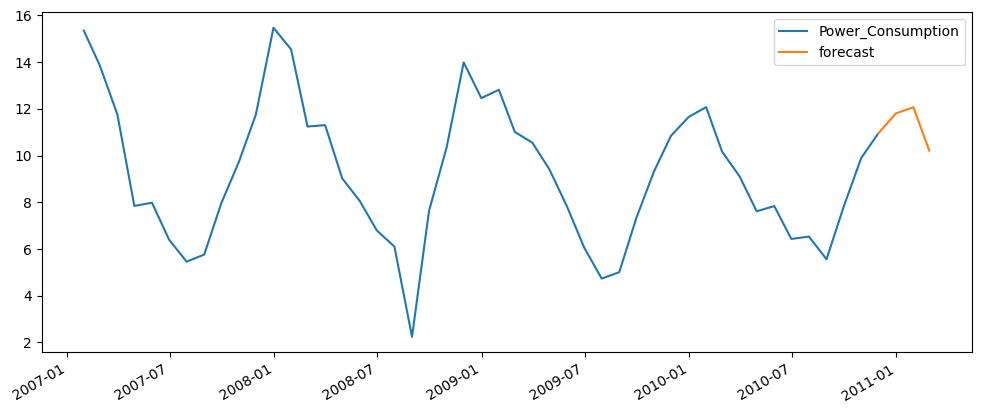

In [51]:
future_df[['Power_Consumption', 'forecast']].plot(figsize=(12, 5))

# Sarima

In [52]:
#ARIMA & SARIMAX
from statsmodels.tsa.stattools import adfuller
ad_test=adfuller(month_df['Power_Consumption'])
print(f'p-value: {ad_test[1]}')
if ad_test[1] < 0.05:
    print('we reject the null hypothesis, Data is stationary')
else:
    print('we fail to reject the null hypothesis, Data is non-stationary')

p-value: 0.7823636894117034
we fail to reject the null hypothesis, Data is non-stationary


In [53]:
!pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ec/2b/e7d18360d56396b62781ba4616527af49244d4bed51f0780646fa3953cc8/pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.3 MB/s eta 0:00:00


In [54]:
from pmdarima import auto_arima

In [55]:
model=auto_arima(month_df['Power_Consumption'], m=12, seasonal=True, max_order=3, test='adf', error_action='ignore', stepwise=True, start_p=0, start_q=0, trace=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=189.700, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=240.014, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=181.665, Time=0.27 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=199.534, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=348.893, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=200.627, Time=0.08 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=177.713, Time=0.89 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=191.424, Time=0.18 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=179.500, Time=1.44 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=179.628, Time=1.43 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=181.485, Time=1.69 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=179.296, Time=0.85 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   47
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                 -83.857
Date:                              Sun, 05 May 2024   AIC                            177.713
Time:                                      12:12:59   BIC                            186.964
Sample:                                  01-31-2007   HQIC                           181.195
                                       - 11-30-2010                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0697      0.503      0.139      0.890      -0.915       1.055
ar.L1          0.6006      0.155      3.873      0.000       0.297       0.905
ar.S.L12       0.9812      0.135      7.292      0.000       0.717       1.245
ma.S.L12      -0.7291      0.905     -0.806      0.421      -2.503       1.045
sigma2         1.4142      0.963      1.468      0.142      -0.474       3.302
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 3.94
Prob(Q):                              0.77   Prob(JB):                         0.14
Heteroskedasticity (H):               0.28   Skew:                            -0.15
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
month_df['first_diff']= month_df['Power_Consumption'] - month_df['Power_Consumption'].shift(1)
month_df['seasonal_first_diff']= month_df['Power_Consumption'] - month_df['Power_Consumption'].shift(12)
month_df.drop(['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], axis=1, inplace =True)
month_df.tail()

,Power_Consumption,first_diff,seasonal_first_diff
DateTime,,,
2010-07-31,6.530717,0.101230,1.798589
2010-08-31,5.560138,-0.970579,0.554184
2010-09-30,7.791145,2.231007,0.471657
2010-10-31,9.889516,2.098371,0.581139
2010-11-30,10.942476,1.052959,0.100509


In [57]:
ad_test=adfuller(month_df['seasonal_first_diff'].dropna())
print(f'p-value for monthly df of ADF Test: {ad_test[1]}')

if ad_test[1] < 0.05:
    print('We reject the Null hypothesis, The time series data is stationary')
else:
    print('We fail to reject the Null hyphothesis, The time series data is non-stationary')

p-value for monthly df of ADF Test: 0.00020601225901959274
We reject the Null hypothesis, The time series data is stationary


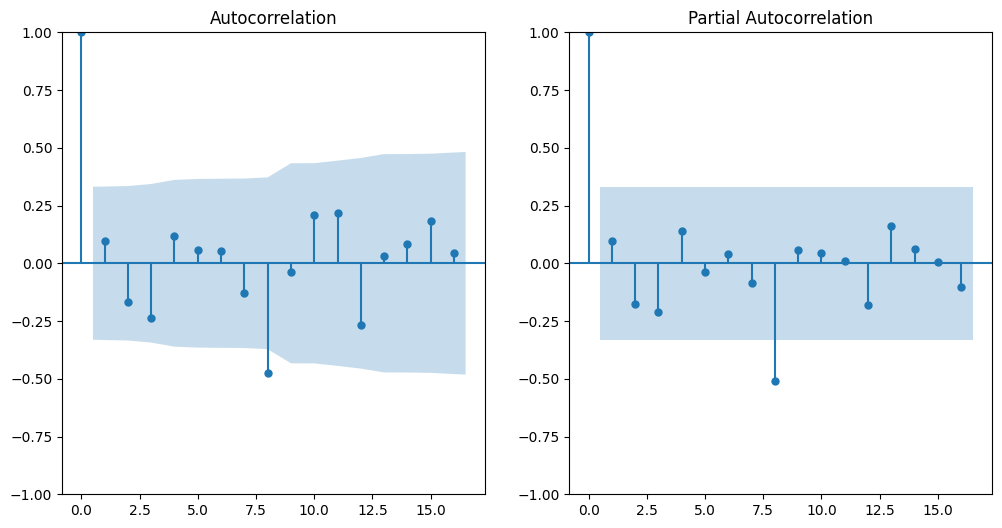

In [58]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig=plt.figure(figsize=(12,6))
ax1=fig.add_subplot(121)
fig=plot_acf(month_df['seasonal_first_diff'].dropna(), lags=16, ax=ax1)
ax2=fig.add_subplot(122)
fig=plot_pacf(month_df['seasonal_first_diff'].dropna(), lags=16, ax=ax2)

from acf and pacf plots: p= 0/1, d=1, q= 0/1

In [59]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [60]:
sr=SARIMAX(month_df['Power_Consumption'].dropna(),order=(1,1,1),seasonal_order=(1,1,1,12))
sr_model=sr.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.88604D+00    |proj g|=  1.01132D+00

At iterate    5    f=  1.27703D+00    |proj g|=  3.35139D-02

At iterate   10    f=  1.24451D+00    |proj g|=  2.80475D-02

At iterate   15    f=  1.23956D+00    |proj g|=  5.14471D-03

At iterate   20    f=  1.23880D+00    |proj g|=  4.18218D-03

At iterate   25    f=  1.23868D+00    |proj g|=  9.26289D-04

At iterate   30    f=  1.23866D+00    |proj g|=  5.05375D-04

At iterate   35    f=  1.23866D+00    |proj g|=  2.28644D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

<Axes: xlabel='DateTime'>

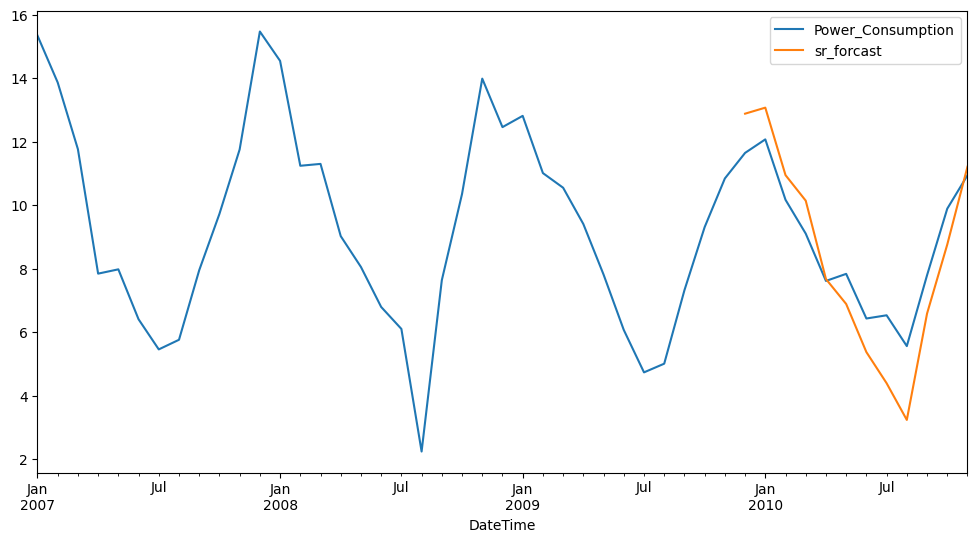

In [61]:
month_df['sr_forcast']=sr_model.predict(start=-12 ,end=-1 ,dynamic=True)
month_df[['Power_Consumption','sr_forcast']].plot(figsize=[12,6])

In [62]:
month_df.tail()

,Power_Consumption,first_diff,seasonal_first_diff,sr_forcast
DateTime,,,,
2010-07-31,6.530717,0.101230,1.798589,4.391219
2010-08-31,5.560138,-0.970579,0.554184,3.234172
2010-09-30,7.791145,2.231007,0.471657,6.583604
2010-10-31,9.889516,2.098371,0.581139,8.759638
2010-11-30,10.942476,1.052959,0.100509,11.211435


In [63]:
data={'date': ['2010-12-31', '2011-01-31', '2011-02-28','2011-03-31']}
future_dates = pd.DataFrame(data)
future_dates

,date
0,2010-12-31
1,2011-01-31
2,2011-02-28
3,2011-03-31


In [64]:
future_dates['datetime'] = future_dates['date'].astype('datetime64[ns]')
future_dates.drop('date', axis=1, inplace= True)
future_dates.set_index('datetime', inplace=True)
future_dates

""
datetime
2010-12-31
2011-01-31
2011-02-28
2011-03-31


In [65]:
future_df=pd.concat([month_df, future_dates])
future_df.tail(10)

,Power_Consumption,first_diff,seasonal_first_diff,sr_forcast
2010-06-30,6.429487,-1.406345,0.360210,5.371161
2010-07-31,6.530717,0.101230,1.798589,4.391219
2010-08-31,5.560138,-0.970579,0.554184,3.234172
2010-09-30,7.791145,2.231007,0.471657,6.583604
2010-10-31,9.889516,2.098371,0.581139,8.759638
2010-11-30,10.942476,1.052959,0.100509,11.211435
2010-12-31,NaN,NaN,NaN,NaN
2011-01-31,NaN,NaN,NaN,NaN
2011-02-28,NaN,NaN,NaN,NaN
2011-03-31,NaN,NaN,NaN,NaN


In [66]:
future_df.shape

(51, 4)

In [67]:
forecast = sr_model.get_forecast(steps=4)
forecast_values = forecast.predicted_mean
forecast_values

2010-12-31    12.332723
2011-01-31    12.623552
2011-02-28    10.528136
2011-03-31     9.663950
Freq: M, Name: predicted_mean, dtype: float64

In [68]:
future_df['forecast']=forecast_values
future_df.tail()

,Power_Consumption,first_diff,seasonal_first_diff,sr_forcast,forecast
2010-11-30,10.942476,1.052959,0.100509,11.211435,NaN
2010-12-31,NaN,NaN,NaN,NaN,12.332723
2011-01-31,NaN,NaN,NaN,NaN,12.623552
2011-02-28,NaN,NaN,NaN,NaN,10.528136
2011-03-31,NaN,NaN,NaN,NaN,9.663950


<Axes: >

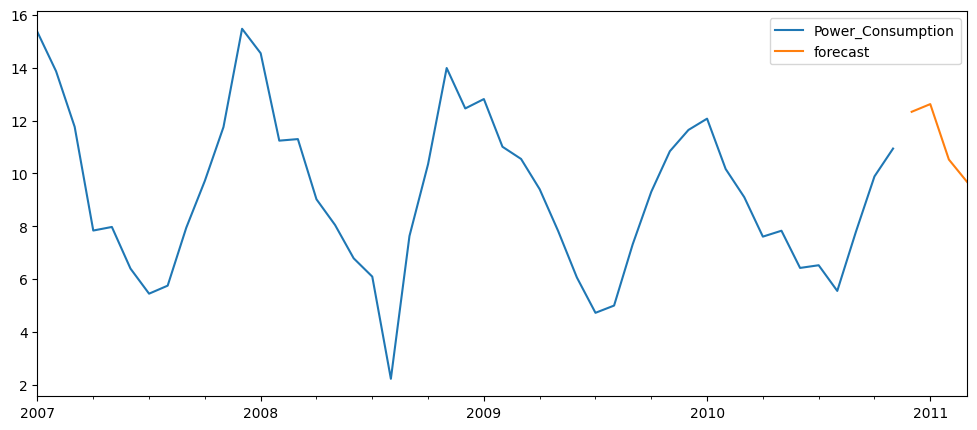

In [69]:
future_df[['Power_Consumption', 'forecast']].plot(figsize=(12, 5))